In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [2]:
#Dictionary for genres label encoding:
genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 
          'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

In [3]:
data=pd.read_csv("./Features/features2.csv")
data.head()

,centroid_mean,centroid_std,chroma_mean,chroma_std,flux_mean,flux_std,genre,mfcc_0_mean,mfcc_0_std,mfcc_10_mean,...,mfcc_8_std,mfcc_9_mean,mfcc_9_std,rmse_mean,rmse_std,roloff_mean,roloff_std,tempo,zcr_mean,zcr_std
0,888.192767,379.074067,0.525691,0.295343,1.557968,1.675129,0,-298.866425,55.572163,-1.312751,...,10.512544,4.846227,12.137277,0.118639,0.061269,1770.389295,1010.104647,172.265625,0.029214,0.015715
1,1001.220509,363.289566,0.497065,0.294911,1.479048,1.466835,0,-239.033478,48.344673,-6.611788,...,8.462409,2.155131,8.355743,0.160613,0.060511,2055.339246,1014.663475,172.265625,0.034871,0.015003
2,846.548114,618.517730,0.576510,0.270677,1.633401,2.636701,0,-317.237152,81.588196,-1.960779,...,10.031506,9.536193,8.848726,0.102250,0.037121,1625.756836,1435.688964,123.046875,0.032692,0.029412
3,973.959994,609.317788,0.564331,0.271416,1.451815,2.326623,0,-300.514404,92.136734,-2.918866,...,10.758454,11.795238,10.521724,0.094613,0.039514,1878.647167,1368.791028,129.199219,0.039325,0.030719
4,1101.462315,365.249696,0.379367,0.298470,1.422705,1.567510,0,-290.625641,67.902252,-7.053016,...,9.873894,-5.429997,10.567539,0.112067,0.066417,2234.553155,871.327336,95.703125,0.050290,0.033235


In [32]:
X = data.drop(['genre'], axis=1).values
y = data['genre'].ravel()

In [33]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [34]:

# Use PCA only for visualization
pca = PCA(n_components=25, whiten=True)
x_pca = pca.fit_transform(X)

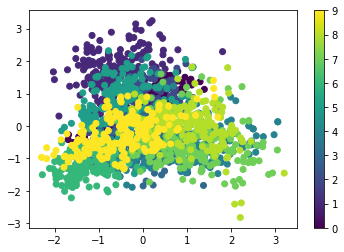

In [35]:

plt.scatter(x_pca[:,0], x_pca[:,1], c=y)
plt.colorbar()
plt.show()

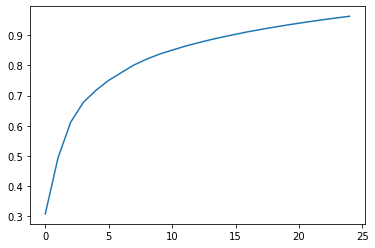

In [36]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [37]:
# Use LDA only for visualization
lda = LDA()
x_lda = lda.fit_transform(X, y)

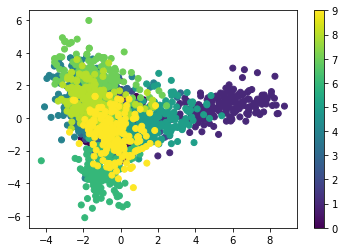

In [38]:
plt.scatter(x_lda[:,0], x_lda[:,1], c=y)
plt.colorbar()
plt.show()

In [39]:

# Using tsne
tsne = TSNE(n_components=2, verbose=1, learning_rate=250)
x_tsne = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1980 samples in 0.003s...
[t-SNE] Computed neighbors for 1980 samples in 0.468s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1980
[t-SNE] Computed conditional probabilities for sample 1980 / 1980
[t-SNE] Mean sigma: 1.793570
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.459686
[t-SNE] KL divergence after 1000 iterations: 1.028445


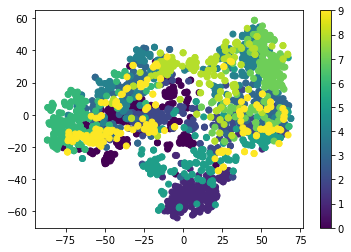

In [40]:
plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y)
plt.colorbar()
plt.show()